#Likelihood of Social Media Presence by Region of Farmers' Market

### Have you ever wondered which part of the U.S. leverages Social Media for local farmers' market sales more or less? 

In [369]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

%matplotlib inline

import statsmodels.api as sm

In [370]:
#import the file and check the first and last rows

markets = pd.read_csv("../GA-DAT-LA-07-Project/Export-5.csv")
markets = markets.replace(np.nan,' ',regex=True) 
markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,,,,,507 Harrison Street,Kalamazoo,Kalamazoo,...,Y,N,Y,N,N,Y,N,N,Y,4/24/2014 18:22
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,,,,,106 S. Main Street,Six Mile,,...,,,,,,,,,,2013
2,1010691,10th Steet Community Farmers Market,,,,,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
3,1002454,112st Madison Avenue,,,,,,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40


In [371]:
#import the file and check the first and last rows

fruitveg = pd.read_csv("../GA-DAT-LA-07-Project/fruitveg.csv")
fruitveg = fruitveg.replace(np.nan,' ',regex=True) 
fruitveg.head()

,Year,Fresh Fruit,Processed Fruit Canning,Processed Fruit Freeze,Processed Fruit Dried,Processed Fruit Juice,Processed Fruit Other,Fresh Vegetables,Processed Vegetables Canning,Processed Vegetables Freeze,Processed Vegetables Dried,Processed Vegetables Chips,Processed Vegetables Legumes
0,1970,100.9,26.2,3.9,10.0,96.7,0.7,154.4,93.0,43.7,13.1,17.4,6.3
1,1971,100.9,26.5,4.0,10.0,101.2,0.6,148.1,108.0,45.3,13.8,17.2,6.8
2,1972,94.4,24.2,4.0,7.2,101.4,0.7,151.4,104.0,45.3,13.3,16.7,5.8
3,1973,96.7,24.5,4.1,10.2,99.8,0.6,148.1,98.7,50.6,14.2,16.3,7.6
4,1974,96.1,24.0,3.3,9.7,101.6,1.0,146.2,99.5,51.0,16.1,15.7,5.5


In [372]:
fruitveg['Fresh Vegetables'].dtype

dtype('float64')

In [373]:
# What data do I have to analyze?

markets.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'region',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y',
       'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [374]:
fruitveg.columns

Index(['Year', 'Fresh Fruit', 'Processed Fruit Canning',
       'Processed Fruit Freeze', 'Processed Fruit Dried',
       'Processed Fruit Juice', 'Processed Fruit Other', 'Fresh Vegetables',
       'Processed Vegetables Canning', 'Processed Vegetables Freeze',
       'Processed Vegetables Dried', 'Processed Vegetables Chips',
       'Processed Vegetables Legumes'],
      dtype='object')

In [375]:
# Create a function to determine when social media information is provided.  Interpretation of this information is 
# the farmers' market actively uses its social media if they chose to share the information in the USDA directory

def social(row):
    if (row['Facebook'] == " ") and (row['Twitter'] == ' ') and (row['Youtube'] == ' ') and (row['OtherMedia'] == ' '):
        return '0'
    return '1'

In [376]:
markets['SocialMedia'] = markets.apply(lambda row: social (row),axis=1)

markets['cleanWildHarvested'] = markets['WildHarvested'].replace({'N':0},regex=True).replace({'Y':1},regex=True).replace({' ':0},regex=True)
markets['cleanCheese'] = markets['Cheese'].replace({'N':0},regex=True).replace({'Y':1},regex=True).replace({' ':0},regex=True)

markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,SocialMedia,cleanWildHarvested,cleanCheese
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,,,,,507 Harrison Street,Kalamazoo,Kalamazoo,...,N,N,Y,N,N,Y,4/24/2014 18:22,0,1,1
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,,,,,106 S. Main Street,Six Mile,,...,,,,,,,2013,0,0,0
2,1010691,10th Steet Community Farmers Market,,,,,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,N,N,N,N,10/28/2014 9:49,1,0,0
3,1002454,112st Madison Avenue,,,,,,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,3/1/2012 10:38,0,0,0
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,Y,Y,N,N,5/1/2015 10:40,1,0,1


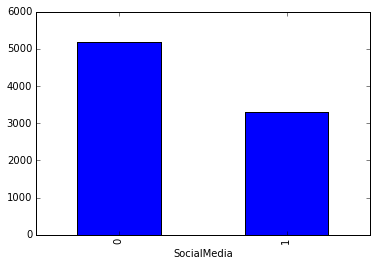

In [377]:
CountbySocial = markets.groupby(markets['SocialMedia'])['FMID'].count()
CountbySocial.plot(kind='bar')

In [378]:
#Clean the updateTime column and change the text into date format

updateTime = markets['updateTime']
markets['cleanUpdateTime'] = pd.to_datetime(pd.Series(updateTime))

In [379]:
#Create year column to allow for counts by year

markets['Year'] = markets['cleanUpdateTime'].dt.year
markets['Year'].tail()

8471    2014
8472    2015
8473    2015
8474    2009
8475    2015
Name: Year, dtype: int64

In [380]:
markets.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'region',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y',
       'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime', 'SocialMedia', 'cleanWildHarvested',
       'cleanCheese', 'cleanUpdateTime', 'Year'],
      dtype='object')

In [381]:
markets1 = markets.merge(fruitveg, on = 'Year', how = 'left')
markets1[['Fresh Fruit']].astype(float)
markets1[['Processed Fruit Canning']].astype(float)
markets1[['Processed Fruit Freeze']].astype(float)
markets1[['Processed Fruit Dried']].astype(float)
markets1[['Processed Fruit Juice']].astype(float)
markets1[['Processed Fruit Other']].astype(float)
markets1[['Fresh Vegetables']].astype(float)
markets1[['Processed Vegetables Canning']].astype(float)
markets1[['Processed Vegetables Freeze']].astype(float)
markets1[['Processed Vegetables Dried']].astype(float)
markets1[['Processed Vegetables Chips']].astype(float)
markets1[['Processed Vegetables Legumes']].astype(float)
markets1.replace(np.nan,' ',regex=True)

markets1['Fresh Fruit'].dtype

dtype('float64')

In [382]:
markets1.rename(columns={'Fresh Fruit': 'freshfruit', 'Processed Fruit Canning': 'procfruitcan', 'Processed Fruit Freeze': 
                         'procfruitfreeze', 'Processed Fruit Juice': 'procfruitjuice', 'Processed Fruit Other': 'procfruitother', 
                         'Fresh Vegetables': 'freshveg', 'Processed Vegetables Canning': 'procvegcan', 
                         'Processed Vegetables Freeze': 'procvegfreeze', 'Processed Vegetables Dried': 'procvegdried', 
                         'Processed Vegetables Chips': 'procvegchips', 'Processed Vegetables Legumes': 'procveglegumes', 
                        }, inplace=True)
markets1.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'region',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y',
       'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime', 'SocialMedia', 'cleanWildHarvested',
       'cleanCheese', 'cleanUpdateTime', 'Year', 'freshfruit', 'procfruitcan',
       'procfruitfreeze', 'Processed Fruit Dried', 'procfruitjuice',
       'procfruitother', 'freshveg', 'procvegcan', 'procvegfreeze',
       'procvegdried', 'procvegchi

In [383]:
markets1['freshveg'].convert_objects(convert_numeric=True).fillna(markets1['freshveg'].mean()).astype(int)


0       187
1       187
2       187
3       191
4       187
5       187
6       187
7       187
8       185
9       187
10      187
11      185
12      187
13      187
14      187
15      187
16      187
17      187
18      187
19      187
20      187
21      187
22      187
23      187
24      187
25      187
26      187
27      191
28      191
29      187
       ... 
8446    185
8447    187
8448    187
8449    187
8450    187
8451    185
8452    185
8453    185
8454    191
8455    187
8456    187
8457    187
8458    185
8459    185
8460    191
8461    191
8462    187
8463    187
8464    191
8465    187
8466    191
8467    190
8468    190
8469    185
8470    185
8471    187
8472    187
8473    187
8474    185
8475    187
Name: freshveg, dtype: int64

In [384]:
markets1['SocialMedia'].convert_objects(convert_numeric=True)

0       0
1       0
2       1
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      1
14      1
15      1
16      1
17      0
18      0
19      1
20      0
21      0
22      1
23      1
24      1
25      1
26      0
27      0
28      0
29      0
       ..
8446    0
8447    1
8448    1
8449    1
8450    1
8451    0
8452    0
8453    0
8454    0
8455    1
8456    1
8457    1
8458    0
8459    0
8460    0
8461    0
8462    1
8463    0
8464    1
8465    1
8466    0
8467    0
8468    0
8469    0
8470    0
8471    1
8472    1
8473    1
8474    0
8475    0
Name: SocialMedia, dtype: int64

### KNeighborsClassifier

In [385]:
from sklearn.cross_validation import train_test_split

# Create the train and test sets
X = markets1[['SocialMedia']].values
y = markets1.State.ravel()

# create 80%-20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [386]:
from sklearn.neighbors import KNeighborsClassifier

print("Shape of Training Sets")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y) 
train_score = neigh.score(X_train,y_train)
cv_score = neigh.score(X_test,y_test)

print("Most Likely State without Social Media for Farmers' Markets: ", neigh.predict([[0]]))
print("Most Likely State with Social Media for Farmers' Markets: ", neigh.predict([[1]]))
print()
print("Predicted Probabilities: ",neigh.predict_proba([[2]]))  
print()
print("Train Score: ",train_score)  
print("CV Score: ",cv_score)  

Shape of Training Sets
X_train:  (6780, 1)
y_train:  (6780,)

Most Likely State without Social Media for Farmers' Markets:  ['Nevada']
Most Likely State with Social Media for Farmers' Markets:  ['North Carolina']

Predicted Probabilities:  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Train Score:  0.016814159292
CV Score:  0.0176886792453


### Logistic Regresion of Social Media Based on Fresh Fruit per Capita by Year

In [387]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

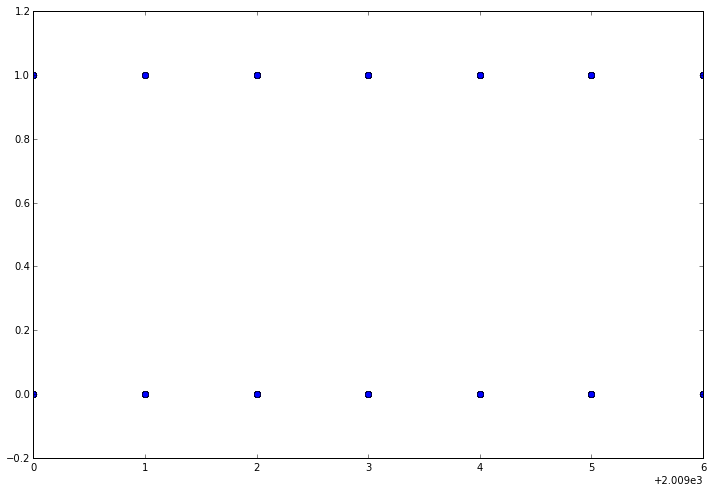

In [388]:
# Set X to Year and y for Social Media. The purpose is to leverage the 0 and 1 values in the Social Media column
# and use itself to find the probability either way

X = markets1.Year.values
y = markets1.SocialMedia.values
fig, axes = plt.subplots(1,1, figsize=(12, 8))
axes.set_ylim((-0.2, 1.2))
plt.plot(X, y, 'o')

In [389]:
def fit_logistic(X_train, y_train, reg=0.0001, penalty="l2"):
    clf = LogisticRegression(C=reg, penalty=penalty)
    clf.fit(X_train, y_train)
    return clf

def cv_optimize(X_train, y_train, paramslist, penalty="l2", n_folds=10):
    clf = LogisticRegression(penalty=penalty)
    parameters = {"C": paramslist}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X_train, y_train)
    return gs.best_params_, gs.best_score_

def cv_and_fit(X_train, y_train, paramslist, penalty="l2", n_folds=5):
    bp, bs = cv_optimize(X_train, y_train, paramslist, penalty=penalty, n_folds=n_folds)
    print("BP: {}, BS: {}".format(bp, bs))
    clf = fit_logistic(X_train, y_train, penalty=penalty, reg=bp['C'])
    return clf

In [390]:
clf=cv_and_fit(X.reshape(-1,1), y, np.logspace(-4, 5, num=100))

BP: {'C': 0.0001}, BS: 0.610193487494101


In [391]:
pd.crosstab(y, clf.predict(X.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0
Actual,
0,5172
1,3304


### Try putting Social Media against Fresh Vegetables (And, Feature Scaling)

In [443]:
markets1['freshveg2'] = markets1['freshveg'].convert_objects(convert_numeric=True).fillna(markets1['freshveg'].mean()).astype(int)
markets1['freshveg2'].head()

0    187
1    187
2    187
3    191
4    187
Name: freshveg2, dtype: int64

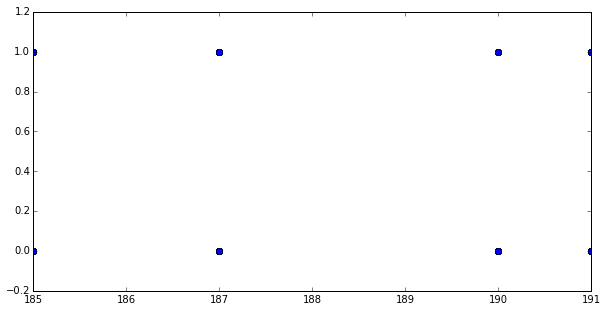

In [446]:
# Set X to freshveg and y for Social Media. The purpose is to leverage the 0 and 1 values in the Social Media column
# and use itself to find the probability Social Media usage when fresh vegetables are sold at the farmers' markets.

# Try feature scaling to bring the per Capita fresh vegetable consumption by year data merged into the farmers' market
# data.

from sklearn import preprocessing

X = markets1.freshveg2.values
y = markets1.SocialMedia.values

#min_max_scaler = preprocessing.MinMaxScaler(X)
#X_train_minmax = min_max_scaler.fit_transform(X_train)
#print(X_train_minmax)

fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.set_ylim((-0.2, 1.2))
plt.plot(X, y, 'o')

In [449]:
X.shape

(8476,)

In [450]:
y.shape

(8476,)

In [447]:
def fit_logistic(X_train, y_train, reg=0.0001, penalty="l2"):
    clf = LogisticRegression(C=reg, penalty=penalty)
    clf.fit(X_train, y_train)
    return clf

def cv_optimize(X_train, y_train, paramslist, penalty="l2", n_folds=10):
    clf = LogisticRegression(penalty=penalty)
    parameters = {"C": paramslist}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X_train, y_train)
    return gs.best_params_, gs.best_score_

def cv_and_fit(X_train, y_train, paramslist, penalty="l2", n_folds=5):
    bp, bs = cv_optimize(X_train_minmax, y_train, paramslist, penalty=penalty, n_folds=n_folds)
    print("BP: {}, BS: {}".format(bp, bs))
    clf = fit_logistic(X_train, y_train, penalty=penalty, reg=bp['C'])
    return clf

In [448]:
clf=cv_and_fit(X.reshape(-1,1), y, np.logspace(-4, 5, num=100))

ValueError: Found arrays with inconsistent numbers of samples: [6780 8476]

In [ ]:
pd.crosstab(y, clf.predict(X.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])